# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [3]:
from citipy import citipy
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url ="https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

#define the unit to metric
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units="+ units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapa'a
Processing Record 2 of Set 1 | isafjordur
Processing Record 3 of Set 1 | uturoa
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | cidreira
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | puerto lempira
Processing Record 10 of Set 1 | rikaze
Processing Record 11 of Set 1 | alo
Processing Record 12 of Set 1 | rongelap
Processing Record 13 of Set 1 | as sulayyil
Processing Record 14 of Set 1 | saudarkrokur
Processing Record 15 of Set 1 | ocean pointe
City not found. Skipping...
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | yaren
Processing Record 19 of Set 1 | crespo
Processing Record 20 of Set 1 | shiwan
Processing Record 21 of Set 1 | aasiaat
Processing Record 22 of Set 1 | ridder
Proces

Processing Record 41 of Set 4 | sept-iles
Processing Record 42 of Set 4 | laojunmiao
Processing Record 43 of Set 4 | coihueco
Processing Record 44 of Set 4 | melfort
Processing Record 45 of Set 4 | patacamaya
Processing Record 46 of Set 4 | fort bragg
Processing Record 47 of Set 4 | fisterra
Processing Record 48 of Set 4 | severo-yeniseyskiy
Processing Record 49 of Set 4 | itaituba
Processing Record 0 of Set 5 | bilibino
Processing Record 1 of Set 5 | arteche
Processing Record 2 of Set 5 | okha
Processing Record 3 of Set 5 | lospalos
Processing Record 4 of Set 5 | codrington
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | zaragoza
Processing Record 7 of Set 5 | keflavik
Processing Record 8 of Set 5 | petropavlovsk-kamchatsky
Processing Record 9 of Set 5 | daru
Processing Record 10 of Set 5 | puerto aysen
Processing Record 11 of Set 5 | voss
Processing Record 12 of Set 5 | buka
Processing Record 13 of Set 5 | bull savanna
Processing Record 14 of Set 5 | serenje
Pro

Processing Record 31 of Set 8 | bikenibeu village
Processing Record 32 of Set 8 | hasaki
Processing Record 33 of Set 8 | sovetskaya gavan'
Processing Record 34 of Set 8 | comodoro rivadavia
Processing Record 35 of Set 8 | general jose de san martin
Processing Record 36 of Set 8 | ubiaja
Processing Record 37 of Set 8 | dudinka
Processing Record 38 of Set 8 | polyarnyye zori
Processing Record 39 of Set 8 | ust'-kut
Processing Record 40 of Set 8 | st. albert
Processing Record 41 of Set 8 | tralee
Processing Record 42 of Set 8 | ikwiriri
Processing Record 43 of Set 8 | el granada
Processing Record 44 of Set 8 | winburg
Processing Record 45 of Set 8 | sur
Processing Record 46 of Set 8 | rangendingen
Processing Record 47 of Set 8 | gafanha da nazare
Processing Record 48 of Set 8 | port blair
Processing Record 49 of Set 8 | seybaplaya
Processing Record 0 of Set 9 | susanville
Processing Record 1 of Set 9 | la'ie
Processing Record 2 of Set 9 | vostochnyy
Processing Record 3 of Set 9 | saint cr

Processing Record 18 of Set 12 | bayganin
Processing Record 19 of Set 12 | west fargo
Processing Record 20 of Set 12 | muli
Processing Record 21 of Set 12 | grand falls-windsor
Processing Record 22 of Set 12 | topolovgrad
Processing Record 23 of Set 12 | general pico
Processing Record 24 of Set 12 | egilsstadir
Processing Record 25 of Set 12 | quatre cocos
Processing Record 26 of Set 12 | ras al khaimah city
Processing Record 27 of Set 12 | sciacca
Processing Record 28 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 29 of Set 12 | klaksvik
Processing Record 30 of Set 12 | richland
Processing Record 31 of Set 12 | portland
Processing Record 32 of Set 12 | qarqaraly
Processing Record 33 of Set 12 | greenville
Processing Record 34 of Set 12 | colonia
Processing Record 35 of Set 12 | rabo de peixe
Processing Record 36 of Set 12 | san miguel
Processing Record 37 of Set 12 | dzhambeyty
Processing Record 38 of Set 12 | miguel aleman (la doce)
City not found. Skipping...
P

In [7]:
len(city_data)

597

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapa'a,22.0752,-159.3190,22.99,93,70,3.63,US,1701450014
1,isafjordur,66.0755,-23.1240,-0.98,69,75,3.60,IS,1701450015
2,uturoa,-16.7333,-151.4333,27.12,81,49,8.23,PF,1701450016
3,waitangi,-43.9535,-176.5597,10.46,62,87,5.00,NZ,1701450019
4,adamstown,-25.0660,-130.1015,21.49,73,8,4.12,PN,1701450026


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapa'a,22.0752,-159.3190,22.99,93,70,3.63,US,1701450014
1,isafjordur,66.0755,-23.1240,-0.98,69,75,3.60,IS,1701450015
2,uturoa,-16.7333,-151.4333,27.12,81,49,8.23,PF,1701450016
3,waitangi,-43.9535,-176.5597,10.46,62,87,5.00,NZ,1701450019
4,adamstown,-25.0660,-130.1015,21.49,73,8,4.12,PN,1701450026


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [20]:
#extract relevent fields from the dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


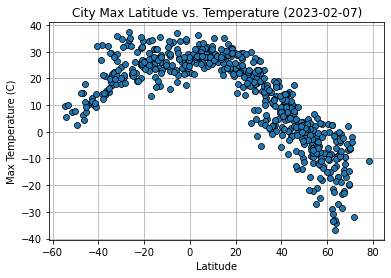

In [21]:
# Build scatter plot for latitude vs. temperature
plt.plot(city_data_df["Lat"], 
         city_data_df["Max Temp"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

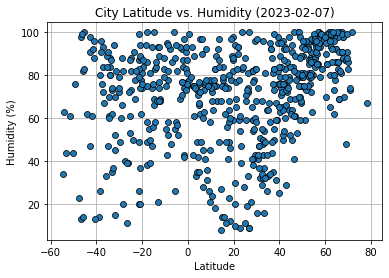

In [22]:

# Build the scatter plots for latitude vs. humidity
plt.plot(city_data_df["Lat"], 
         city_data_df["Humidity"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

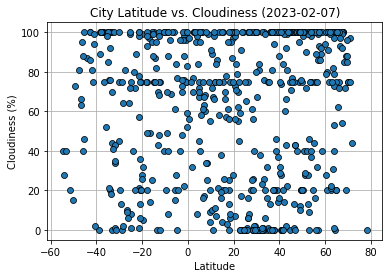

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.plot(city_data_df["Lat"], 
         city_data_df["Cloudiness"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

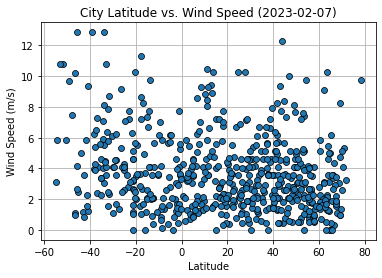

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.plot(city_data_df["Lat"], 
         city_data_df["Wind Speed"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_c=.1, y_c=.9):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(x_c, y_c), xycoords='axes fraction', fontsize=15,color="red")
    plt.xlabel ("Latitude")
    plt.ylabel (y_values.name)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapa'a,22.0752,-159.3190,22.99,93,70,3.63,US,1701450014
1,isafjordur,66.0755,-23.1240,-0.98,69,75,3.60,IS,1701450015
7,kodiak,57.7900,-152.4072,2.73,93,100,4.12,US,1701450027
8,puerto lempira,15.2667,-83.7667,30.08,84,20,0.00,HN,1701450027
9,rikaze,29.2500,88.8833,-1.51,42,2,1.88,CN,1701450027


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,uturoa,-16.7333,-151.4333,27.12,81,49,8.23,PF,1701450016
3,waitangi,-43.9535,-176.5597,10.46,62,87,5.00,NZ,1701450019
4,adamstown,-25.0660,-130.1015,21.49,73,8,4.12,PN,1701450026
5,cidreira,-30.1811,-50.2056,24.35,79,45,6.14,BR,1701450026
6,port-aux-francais,-49.3500,70.2167,2.40,76,73,9.67,TF,1701450027


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.80370455454652


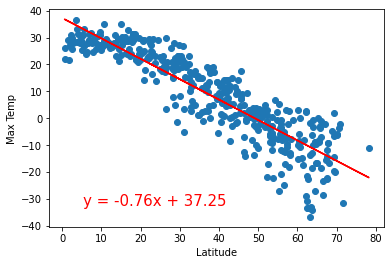

In [28]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.1, 0.1)

The r-value is: 0.36050518847705837


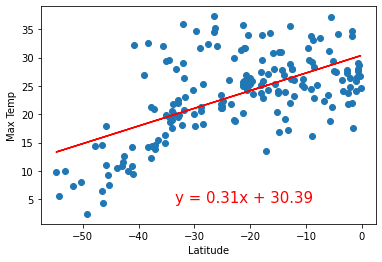

In [29]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.4, 0.1)


**Discussion about the linear relationship:** 

Northern Hemisphere:

The relationship between latitude and max tempuratures displays a strong negative correlation. The r-value is ~ 0.77 (rounded up) Max temperature drops as the latitude increases. Southern Hemisphere:

There is no correlation between latitude and max tempuratures The r-value is ~ 0.16 (rounded up)

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.19545846772771952


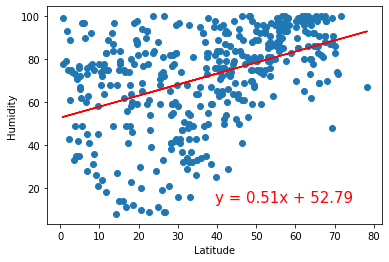

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

The r-value is: 0.03182466969519292


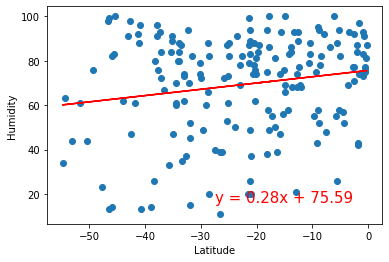

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

**Discussion about the linear relationship:** 
There is no correlation between latitude and humidity The r-value is ~ 0.18 (rounded up) Southern Hemisphere:

There is no correlation between latitude and humidity The r-value is ~ 0.1 (rounded up)

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.028741761319391948


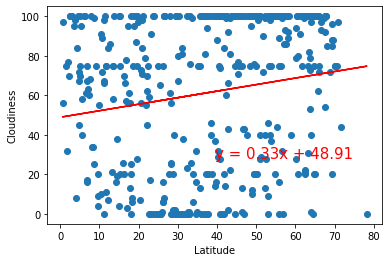

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, 0.5, 0.3)


The r-value is: 0.0034483203822909462


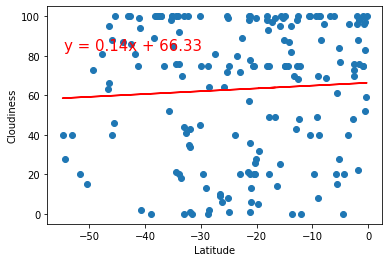

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, 0.05, 0.8)


**Discussion about the linear relationship:** 
There is no correlation between Latitude and Cloudliness The r-value is ~ 0.05 (rounded up) Southern Hemisphere:

There is no correlation between Latitude and Cloudliness The r-value is ~ 0.19 (rounded up)

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.015113311613796709


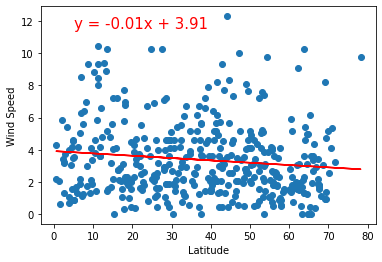

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values)

The r-value is: 0.10187670209100051


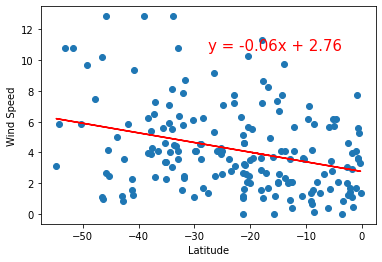

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, 0.5, 0.8)

**Discussion about the linear relationship:** 
Northern Hemisphere:

There is no correlation between Latitude and Wind Speed The r-value is ~ 0.01 (rounded up) Southern Hemisphere:

There is no correlation between Latitude and Wind Speed The r-value is ~ 0.09 (rounded up)